In [2]:
# Step 0: Libraries
import pandas as pd  # handling and manipulating tabular data
import numpy as np  # numerical computations
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization

# building, evaluating, and validating machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset 50%
df = pd.read_csv('merged_data.csv', low_memory=False)

# Randomly sample 50% of the dataset
df = df.sample(frac=0.5, random_state=42)  # Set random_state for reproducibility

# Reset index for the new sampled DataFrame (optional)
df.reset_index(drop=True, inplace=True)

print(f"Original dataset size: {pd.read_csv('merged_data.csv', low_memory=False).shape[0]} rows")
print(f"Sampled dataset size: {df.shape[0]} rows")

Original dataset size: 11509051 rows
Sampled dataset size: 5754526 rows


In [3]:
print("\nDataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())


Dataset Overview:
      X     Y     Z        EDA      HR   TEMP  id  \
0 -20.0 -56.0  21.0   7.717209   81.60  34.21  E4   
1 -49.0  18.0  40.0   0.255221  115.75  28.97  6D   
2   3.0  21.0  71.0   9.744102  106.18  34.11  E4   
3  56.0  12.0 -26.0   0.189755  113.77  34.89  F5   
4 -12.0 -61.0  11.0  11.805719  102.57  34.16  E4   

                        datetime  label  
0  2020-07-01 17:14:49.624999936    2.0  
1  2020-07-16 16:53:26.281250048    0.0  
2  2020-07-01 16:01:28.156250112    2.0  
3  2020-07-16 19:38:07.531249920    0.0  
4  2020-06-29 15:53:57.031249920    2.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754526 entries, 0 to 5754525
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)


In [4]:
print("\nChecking for duplicates...")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")


Checking for duplicates...
Number of duplicate rows: 26345
Duplicates removed.


In [5]:
print("Missing Values Per Column:\n")
print(df.isnull().sum())

# Handle missing values for numeric columns only
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print("Missing values in numeric columns handled.")

Missing Values Per Column:

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64
Missing values in numeric columns handled.


### Data exploration and visualization


Visualizing the distribution of numeric columns...


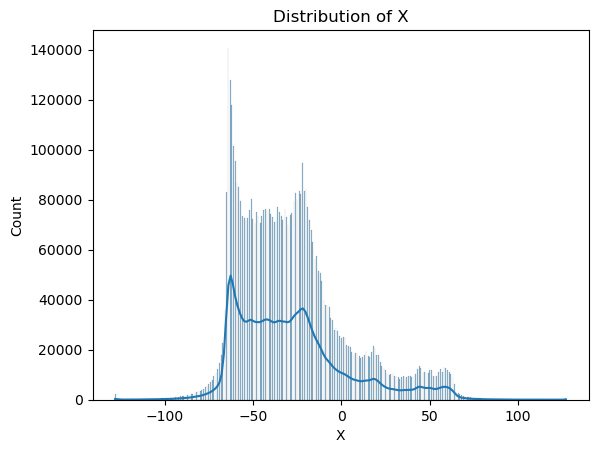

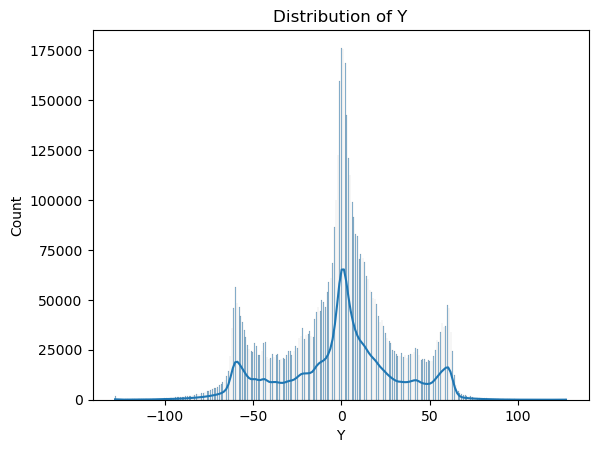

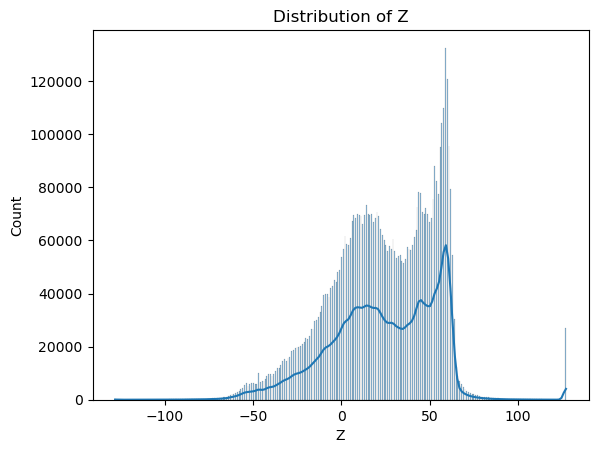

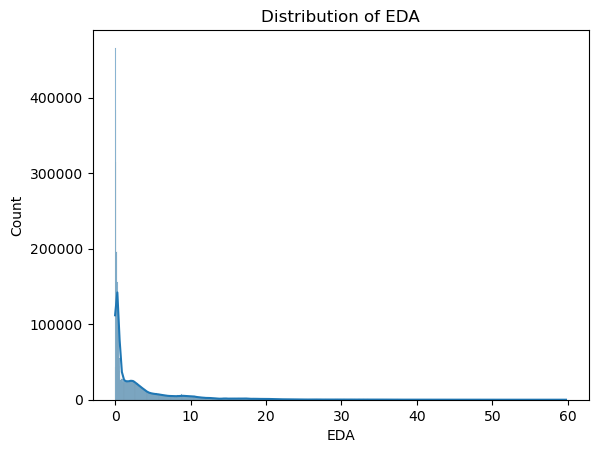

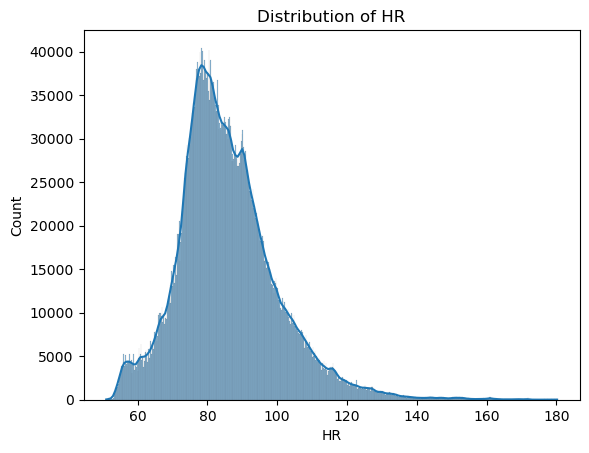

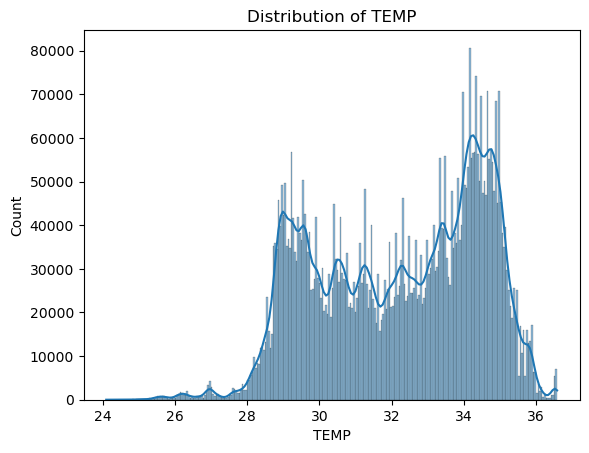

In [6]:
print("\nVisualizing the distribution of numeric columns...")
numeric_columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']
for column in numeric_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


Class Distribution in 'label':
label
2.0    4252526
0.0    1081151
1.0     394504
Name: count, dtype: int64


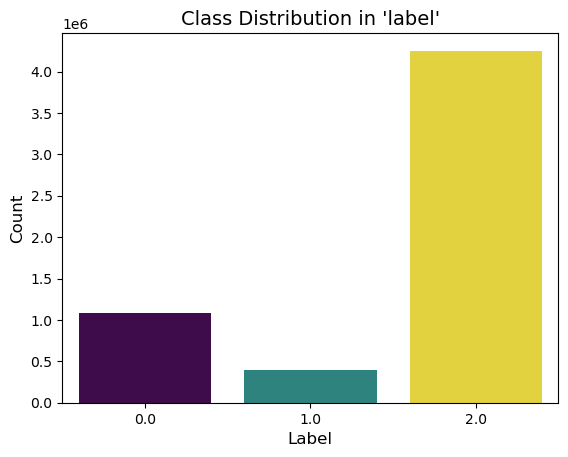

In [7]:
if 'label' in df.columns:
    print("\nClass Distribution in 'label':")
    print(df['label'].value_counts())
    sns.countplot(x='label', data=df, hue='label', palette='viridis', legend=False)  # Explicitly set `hue` to `x` variable
    plt.title("Class Distribution in 'label'", fontsize=14)
    plt.xlabel("Label", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


### Process the 'id' & 'datetime' column

In [8]:
if 'id' in df.columns:
    try:
        df['id'] = pd.to_numeric(df['id'], errors='coerce')  # Convert to numeric, set invalid values to NaN
        print("\nProcessed 'id' column.")
    except Exception as e:
        print("Error processing 'id' column:", e)


Processed 'id' column.


In [9]:
if 'datetime' in df.columns:
    try:
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
        print("\nProcessed 'datetime' column.")
    except Exception as e:
        print("Error processing 'datetime' column:", e)


Processed 'datetime' column.


In [10]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print("\nScaled numeric columns.")


Scaled numeric columns.


In [11]:
# Drop unnecessary columns
columns_to_drop = ['datetime', 'id'] if 'datetime' in df.columns and 'id' in df.columns else []
df = df.drop(columns=columns_to_drop)

# Define features (X) and target (y)
X = df.drop(columns=['label'])
y = df['label']

# Handle class imbalance using Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)  # Initialize Random Undersampler
X_resampled, y_resampled = rus.fit_resample(X, y)  # Apply undersampling

print("\nClass distribution after random undersampling:")
print(pd.Series(y_resampled).value_counts())  # Check balanced class distribution



Class distribution after random undersampling:
label
0.0    394504
1.0    394504
2.0    394504
Name: count, dtype: int64


### Updated class distribution

C:\Users\User\AppData\Local\Temp\ipykernel_19352\3707073869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')  # Count plot of resampled labels


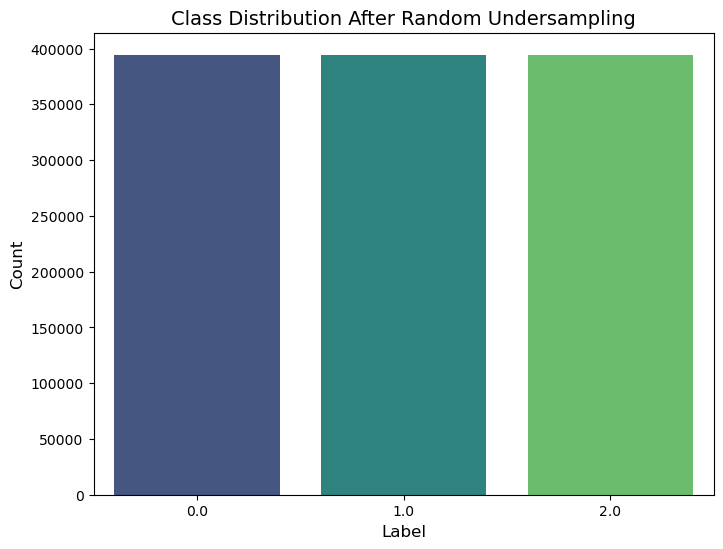

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='viridis')  # Count plot of resampled labels
plt.title("Class Distribution After Random Undersampling", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print("\nData split into training and testing sets.")



Data split into training and testing sets.


In [14]:
# Train the rf model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
print("\nModel trained successfully!")



Model trained successfully!


In [15]:
# Evaluate model performance
y_pred = rf_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    118276
         1.0       0.98      0.99      0.99    118207
         2.0       0.97      0.98      0.98    118571

    accuracy                           0.98    355054
   macro avg       0.98      0.98      0.98    355054
weighted avg       0.98      0.98      0.98    355054

Confusion Matrix:
 [[115760    539   1977]
 [   271 116883   1053]
 [  1630   1270 115671]]
Accuracy Score: 0.98


In [16]:
# Evaluate model performance in 100%
# Generate predictions
y_pred = rf_model.predict(X_test)

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Print the classification report with percentages
print("\nClassification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):  # Exclude 'accuracy', 'macro avg', etc.
        print(f"Class {label}:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value * 100:.2f}%")
    else:
        print(f"{label.capitalize()}: {metrics * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy Score as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy Score: {accuracy:.2f}%")



Classification Report:
Class 0.0:
  Precision: 98.38%
  Recall: 97.87%
  F1-score: 98.13%
  Support: 11827600.00%
Class 1.0:
  Precision: 98.48%
  Recall: 98.88%
  F1-score: 98.68%
  Support: 11820700.00%
Class 2.0:
  Precision: 97.45%
  Recall: 97.55%
  F1-score: 97.50%
  Support: 11857100.00%
Accuracy: 98.10%
Class macro avg:
  Precision: 98.10%
  Recall: 98.10%
  F1-score: 98.10%
  Support: 35505400.00%
Class weighted avg:
  Precision: 98.10%
  Recall: 98.10%
  F1-score: 98.10%
  Support: 35505400.00%

Confusion Matrix:
 [[115760    539   1977]
 [   271 116883   1053]
 [  1630   1270 115671]]
Accuracy Score: 98.10%
